In [23]:
import os
import sys
from os.path import join

import numpy as np
from tqdm import trange
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import proplot as pplt
import seaborn as sns

sys.path.append('..')
from tools import animation as myanim
from tools import beam_analysis as ba
from tools import plotting as myplt

In [24]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['grid.alpha'] = 0.05
plt.rcParams['axes.grid'] = False
plt.rcParams['savefig.dpi'] = 'figure'
plt.rcParams['savefig.transparent'] = False
plt.rcParams['animation.html'] = 'jshtml'
pplt.rc['cmap.discrete'] = False

savefig_kws=dict(dpi=300, facecolor='white')

In [25]:
def load_pybunch(filename):
    X = pd.read_table(filename, sep=' ', skiprows=15, index_col=False, 
                        names=['x','xp','y','yp','z','dE', 'Jx', 'mux', 'nux', 'Jy', 'muy', 'nuy'])
    X.iloc[:, :4] *= 1000. # convert from m-rad to mm-mrad
    X.iloc[:, 5] *= 1000. # convert energy spread from [GeV] to [MeV]
    return X

In [26]:
nu1, nu2 = np.loadtxt('_output/data/eigtunes.dat')

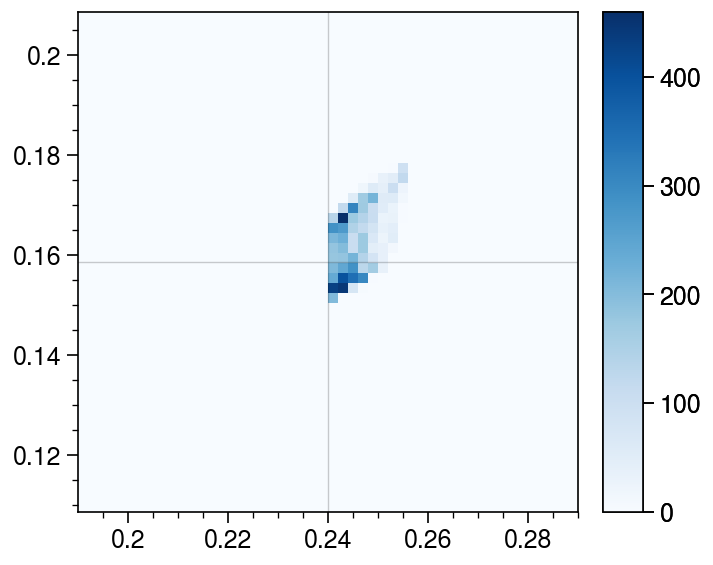

In [47]:
df = load_pybunch('_output/data/bunch.dat')
nux, nuy = df.loc[:, ['nux', 'Jy']].values.T

# limit = (0.15, 0.23)
xlim = (nu1 - 0.05, nu1 + 0.05)
ylim = (nu2 - 0.05, nu2 + 0.05)
fig, ax = pplt.subplots()
H, xedges, yedges, im = ax.hist2d(nux, nuy, cmap='blues', range=(xlim, ylim), bins=50)
fig.colorbar(im)
ax.format(xlim=xlim, ylim=ylim)
ax.axvline(nu1, c='k', zorder=999, alpha=0.2, lw=0.5)
ax.axhline(nu2, c='k', zorder=999, alpha=0.2, lw=0.5)

In [40]:
folder = '_output/'

In [41]:
coords = np.load(join(folder, 'data/coords.npy'))
moments = np.load(join(folder, 'data/moments.npy'))
coords *= 1e3
moments *= 1e6

In [42]:
stats = ba.StatsReader()
stats.read_moments(moments)

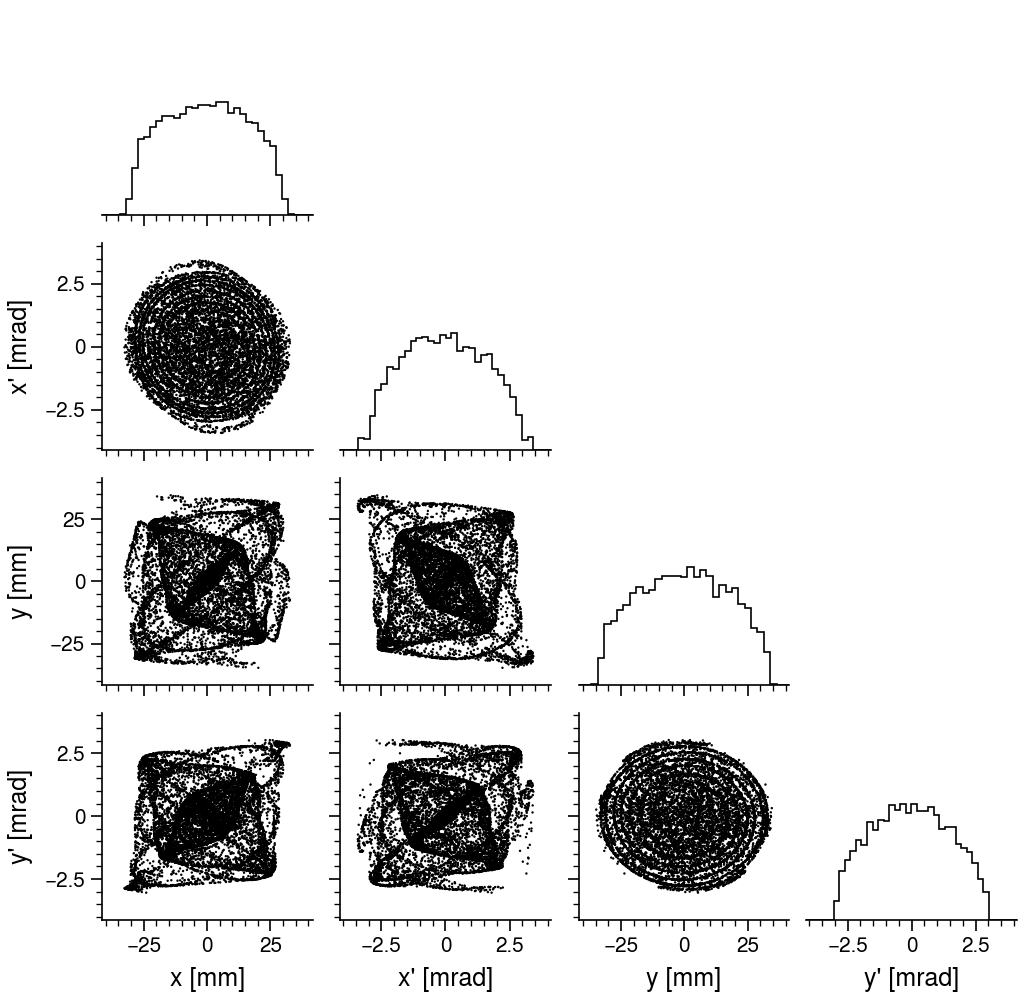

In [43]:
myplt.corner(coords[-1][:, :4], kind='scatter', pad=0.2);

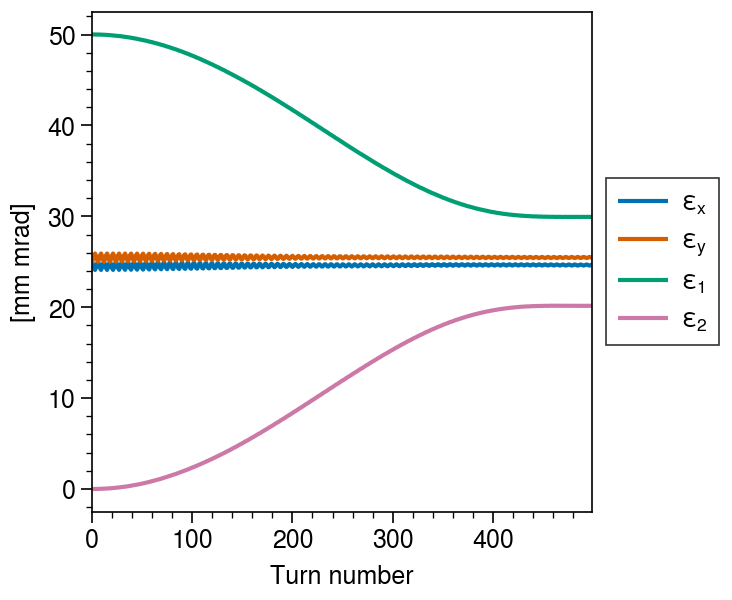

In [45]:
fig, ax = pplt.subplots(figsize=None)
plt_kws = dict()
g1 = ax.plot(stats.twiss2D['eps_x'], label=r'$\varepsilon_x$', **plt_kws)
g2 = ax.plot(stats.twiss2D['eps_y'], label=r'$\varepsilon_y$', **plt_kws)
g3 = ax.plot(stats.twiss4D['eps_1'], label=r'$\varepsilon_1$', **plt_kws)
g4 = ax.plot(stats.twiss4D['eps_2'], label=r'$\varepsilon_2$', **plt_kws)
ax.legend(handles=[g1, g2, g3, g4], ncols=1, loc='r')
ax.format(xlabel='Turn number', ylabel='[mm mrad]')
plt.savefig('_output/figures/emittances.png', **savefig_kws)

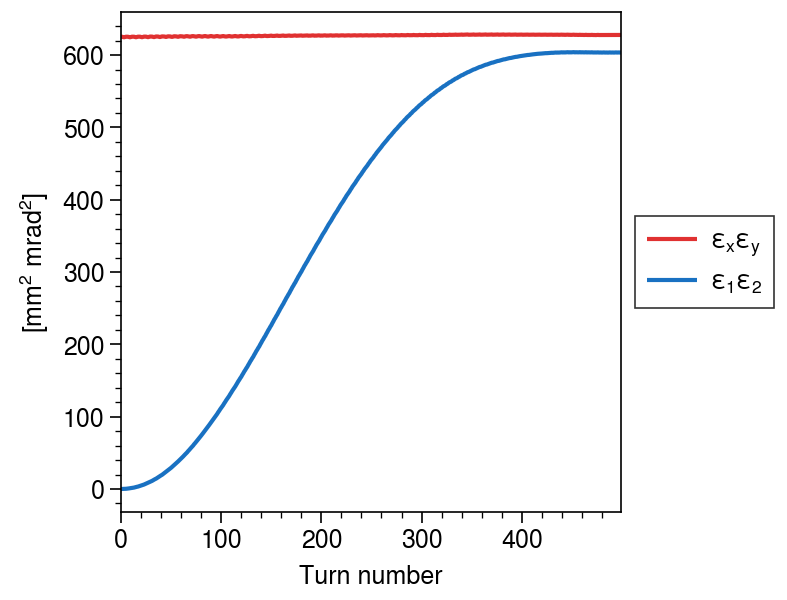

In [44]:
fig, ax = pplt.subplots(figsize=None)
g1 = ax.plot(stats.twiss2D['eps_x'] * stats.twiss2D['eps_y'], 
             label=r'$\varepsilon_x\varepsilon_y$', color='red8', **plt_kws)
g2 = ax.plot(stats.twiss4D['eps_1'] * stats.twiss4D['eps_2'], 
             label=r'$\varepsilon_1\varepsilon_2$', color='blue8', **plt_kws)
ax.legend(handles=[g1, g2], ncols=1, loc='r')
ax.format(xlabel='Turn number', ylabel=r'[mm$^2$ mrad$^2$]')
plt.savefig('_output/figures/emittances4D.png', **savefig_kws)

### Tunes 

In [34]:
# mass = 0.93827231 # [GeV/c^2]
# kin_energy = 1.0 # [GeV]
# alpha_x = 0.06951453814317858
# alpha_y = 0.01091131703789978
# beta_x = 12.243573284689077
# beta_y = 12.030511575868042
# tune_calc = ba.TuneCalculator(mass, kin_energy, alpha_x, alpha_y, beta_x, beta_y)

In [35]:
# tunes_list = []
# for t in trange(len(coords) - 1):
#     tunes = tune_calc.get_tunes(coords[t], coords[t + 1])
#     tunes_list.append(tunes)

In [36]:
# window = 0.07
# numin = 0.18 - 0.5 * window
# numax = 0.18 + 0.5 * window
# lim = (numin, numax)
# t = 400

# g = sns.jointplot(
#     x=tunes_list[t][:, 0], y=tunes_list[t][:, 1],
#     kind='hist', xlim=lim, ylim=lim,
#     height=4,
#     joint_kws=dict(cmap='binary'),
#     marginal_kws=dict(bins='auto', color='black', ec=None))
# g.ax_joint.set_xlabel(r'$\nu_x$')
# g.ax_joint.set_ylabel(r'$\nu_y$')
# line_kws = dict(color='red', lw=1, alpha=0.25)
# g.ax_joint.axvline(nux, **line_kws)
# g.ax_joint.axhline(nuy, **line_kws)
# plt.show()

In [37]:
# def callback(current_frame, total_frames):
#     if current_frame % 10 == 0:
#         print('Saving frame {}/{}'.format(current_frame, total_frames))

In [38]:
# tmax = 500
# skip = 2

# g = sns.JointGrid(xlim=lim, ylim=lim, height=4)
# fig = g.fig
# line_kws = dict(color='red', lw=0.4, alpha=0.25)
# g.ax_joint.axvline(nux, **line_kws)
# g.ax_joint.axhline(nuy, **line_kws)
# g.ax_joint.set_xlabel(r'$\nu_x$')
# g.ax_joint.set_ylabel(r'$\nu_y$')
# plt.tight_layout()
# plt.close()

# joint_kws = dict(range=(lim, lim), bins=75, cmap='binary')
# marginal_kws = dict(color='black', bins='auto', histtype='stepfilled')

# def update(t):
#     t *= skip
#     t = min(t, tmax - 2)
#     tunes = tunes_list[t]
#     for ax in [g.ax_joint, g.ax_marg_x, g.ax_marg_y]:
#         for artist in ax.artists:
#             artist.set_visible(False)
#         for patch in ax.patches:
#             patch.set_visible(False)

#     g.ax_joint.hist2d(tunes[:, 0], tunes[:, 1], **joint_kws)
#     g.ax_marg_x.hist(tunes[:, 0], **marginal_kws)
#     g.ax_marg_y.hist(tunes[:, 1], orientation='horizontal', **marginal_kws)
#     for text in g.ax_joint.texts:
#         text.remove()
#     g.ax_joint.annotate('turn {:3.0f}-{:3.0f}'.format(t, t + 1), 
#                         xy=(0.02, 0.95), xycoords='axes fraction')

# fps = 6
# interval = 1000. / fps
# frames = tmax // skip
# # frames = 10
# anim = animation.FuncAnimation(fig, update, frames=frames, interval=interval)
# # anim
# anim.save('_output/figures/tunes.mp4', dpi=350, progress_callback=callback)